# SatellitePhenology exact restart (ERS) test result comparison

This notebook visualizes the exact restart differences found when trying to update the filter loop structure that `SatellitePhenology` uses for FATES sp mode.  The original filter used for clm sp mode is `nolakep`.  The fates sp mode update uses `all_soil_patches` filter as of commit https://github.com/ESCOMP/CTSM/pull/1182/commits/1229615c040bea3c42638354681c73003128cde1 

## Import libraries

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import ctsm_py.fates_xarray_funcs as fx
import nc_time_axis

## Load history output data

In [2]:
# soilp
fn_soilp_base = 'ERS_Ld30.f45_f45_mg37.I2000Clm50FatesCru.cheyenne_intel.clm-FatesReducedComplexSatellitePhenology.spmode-nploop-charliefix-soilp.clm2.h0.2000-01-01-00000.nc.base'
fn_soilp_rest = 'ERS_Ld30.f45_f45_mg37.I2000Clm50FatesCru.cheyenne_intel.clm-FatesReducedComplexSatellitePhenology.spmode-nploop-charliefix-soilp.clm2.h0.2000-01-01-00000.nc.rest'

# all_soil_patches
fn_allsoil_base = 'ERS_Ld30.f45_f45_mg37.I2000Clm50FatesCru.cheyenne_intel.clm-FatesReducedComplexSatellitePhenology.spmode-nploop-charliefix-diag1.clm2.h0.2000-01-01-00000.nc.base'
fn_allsoil_rest = 'ERS_Ld30.f45_f45_mg37.I2000Clm50FatesCru.cheyenne_intel.clm-FatesReducedComplexSatellitePhenology.spmode-nploop-charliefix-diag1.clm2.h0.2000-01-01-00000.nc.rest'

# nolakep
fn_nolake_base = 'ERS_Ld30.f45_f45_mg37.I2000Clm50FatesCru.cheyenne_intel.clm-FatesReducedComplexSatellitePhenology.spmode-nonploop-charliefix-diag1.clm2.h0.2000-01-01-00000.nc.base'
fn_nolake_rest = 'ERS_Ld30.f45_f45_mg37.I2000Clm50FatesCru.cheyenne_intel.clm-FatesReducedComplexSatellitePhenology.spmode-nonploop-charliefix-diag1.clm2.h0.2000-01-01-00000.nc.rest'

data_sp_base = xr.open_dataset(fn_soilp_base)
data_sp_rest = xr.open_dataset(fn_soilp_rest)
data_as_base = xr.open_dataset(fn_allsoil_base)
data_as_rest = xr.open_dataset(fn_allsoil_rest)
data_nl_base = xr.open_dataset(fn_nolake_base)
data_nl_rest = xr.open_dataset(fn_nolake_rest)

## Plot the data

### TLAI

Variable diff calculations

In [3]:
tlai_sp_base = data_sp_base.TLAI
tlai_sp_rest = data_sp_rest.TLAI
tlai_sp_diff = tlai_sp_base - tlai_sp_rest

tlai_as_base = data_as_base.TLAI
tlai_as_rest = data_as_rest.TLAI
tlai_as_diff = tlai_as_base - tlai_as_rest

tlai_nl_base = data_nl_base.TLAI
tlai_nl_rest = data_nl_rest.TLAI
tlai_nl_diff = tlai_nl_base - tlai_nl_rest

tlai_spas_base_diff = tlai_sp_base - tlai_as_base
tlai_spas_rest_diff = tlai_sp_rest - tlai_as_rest

tlai_asnl_base_diff = tlai_as_base - tlai_nl_base
tlai_asnl_rest_diff = tlai_as_rest - tlai_nl_rest

tlai_spnl_base_diff = tlai_sp_base - tlai_nl_base
tlai_spnl_rest_diff = tlai_sp_rest - tlai_nl_rest

Plot new `all_soil_patches` loop base-rest difference

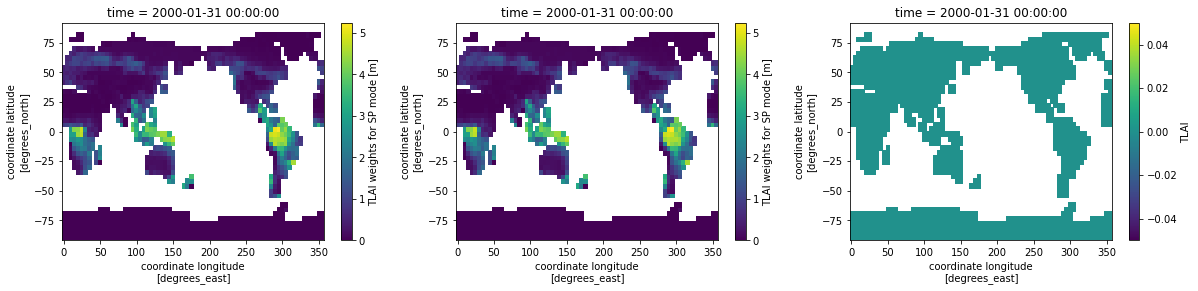

In [4]:
tstop_idx = 30
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
tlai_as_base.isel(time=tstop_idx).plot(ax=ax1)
tlai_as_rest.isel(time=tstop_idx).plot(ax=ax2)
tlai_as_diff.isel(time=tstop_idx).plot(ax=ax3)

Plot `nolakep` loop results

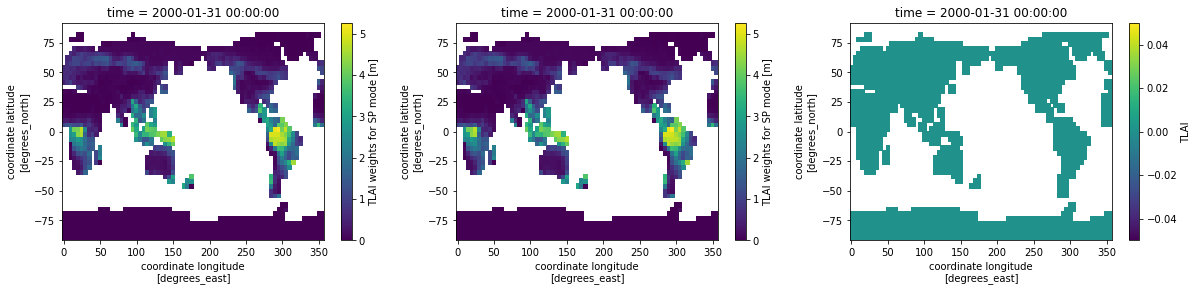

In [5]:
tstop_idx = 30
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
tlai_nl_base.isel(time=tstop_idx).plot(ax=ax1)
tlai_nl_rest.isel(time=tstop_idx).plot(ax=ax2)
tlai_nl_diff.isel(time=tstop_idx).plot(ax=ax3)

Plot `soilp` loop results

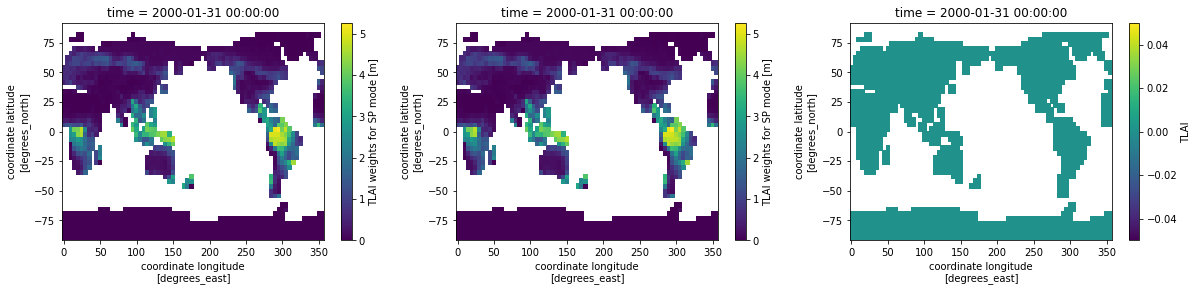

In [6]:
tstop_idx = 30
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
tlai_sp_base.isel(time=tstop_idx).plot(ax=ax1)
tlai_sp_rest.isel(time=tstop_idx).plot(ax=ax2)
tlai_sp_diff.isel(time=tstop_idx).plot(ax=ax3)

Compare the restarts between the `all_soil_patches` filter and the `nolakep` filter loop

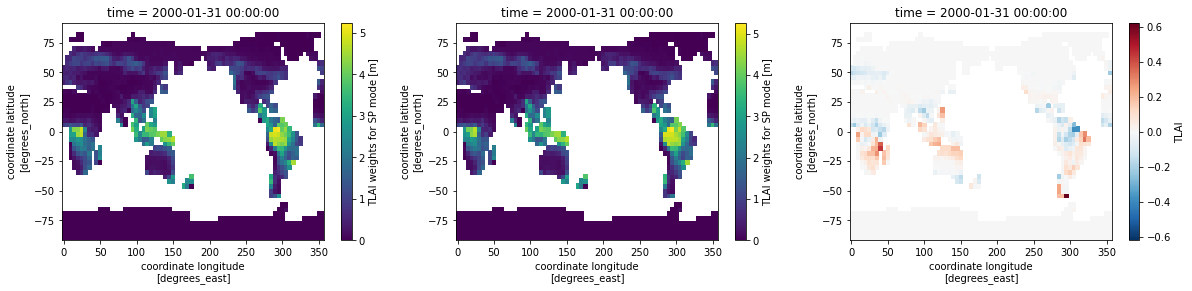

In [7]:
tstop_idx = 30
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
tlai_as_rest.isel(time=tstop_idx).plot(ax=ax1)
tlai_nl_rest.isel(time=tstop_idx).plot(ax=ax2)
tlai_asnl_rest_diff.isel(time=tstop_idx).plot(ax=ax3)

Compare the restarts between the `all_soil_patches` filter and the `soilp` filter loop

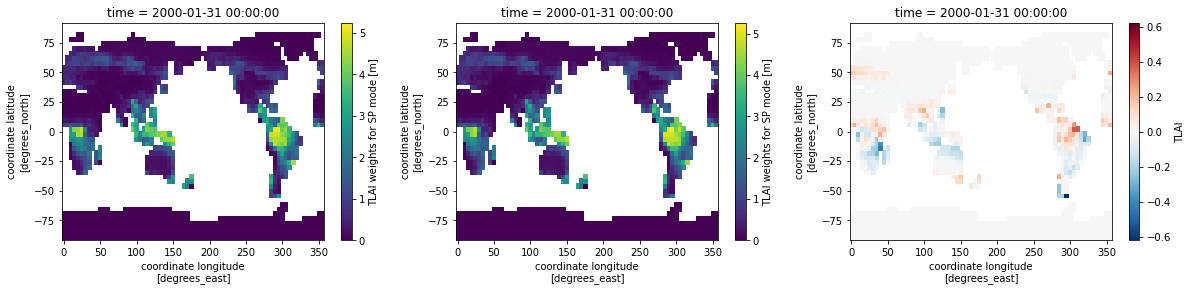

In [8]:
tstop_idx = 30
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
tlai_as_rest.isel(time=tstop_idx).plot(ax=ax1)
tlai_sp_rest.isel(time=tstop_idx).plot(ax=ax2)
tlai_spas_rest_diff.isel(time=tstop_idx).plot(ax=ax3)

Compare the restarts between the `nolakep` filter and the `soilp` filter loop

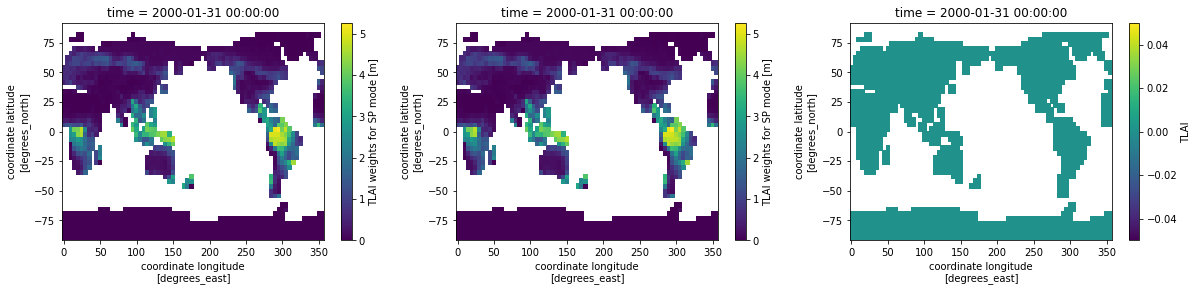

In [9]:
tstop_idx = 30
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
tlai_nl_rest.isel(time=tstop_idx).plot(ax=ax1)
tlai_sp_rest.isel(time=tstop_idx).plot(ax=ax2)
tlai_spnl_rest_diff.isel(time=tstop_idx).plot(ax=ax3)

### GPP

Variable diff calculations

In [10]:
gpp_sp_base = data_sp_base.GPP
gpp_sp_rest = data_sp_rest.GPP
gpp_sp_diff = gpp_sp_base - gpp_sp_rest

gpp_as_base = data_as_base.GPP
gpp_as_rest = data_as_rest.GPP
gpp_as_diff = gpp_as_base - gpp_as_rest

gpp_nl_base = data_nl_base.GPP
gpp_nl_rest = data_nl_rest.GPP
gpp_nl_diff = gpp_nl_base - gpp_nl_rest

gpp_spas_base_diff = gpp_sp_base - gpp_as_base
gpp_spas_rest_diff = gpp_sp_rest - gpp_as_rest

gpp_asnl_base_diff = gpp_as_base - gpp_nl_base
gpp_asnl_rest_diff = gpp_as_rest - gpp_nl_rest

gpp_spnl_base_diff = gpp_sp_base - gpp_nl_base
gpp_spnl_rest_diff = gpp_sp_rest - gpp_nl_rest

Plot new `all_soil_patches` loop base-rest difference.  We see very small differences primarily in single strip in the artic

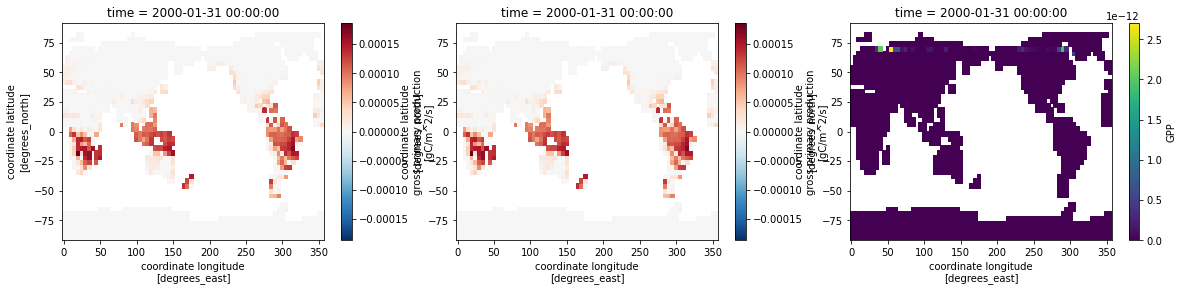

In [11]:
tstop_idx = 30
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
gpp_as_base.isel(time=tstop_idx).plot(ax=ax1)
gpp_as_rest.isel(time=tstop_idx).plot(ax=ax2)
gpp_as_diff.isel(time=tstop_idx).plot(ax=ax3)

Plot the variable mean longitude over time.  We see that issue persists in one latitude band over time.

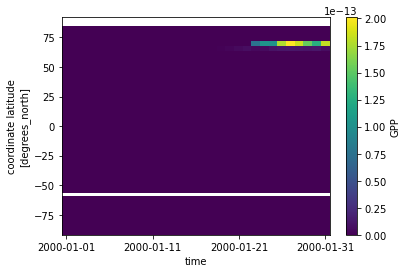

In [12]:
gpp_as_diff.mean(dim='lon').plot(x='time',y='lat')
# gpp_npl_diff.mean(dim='lat').plot(x='time',y='lon')

In [39]:
np.shape(gpp_as_diff.isel(time=tstop_idx))

(46, 72)

In [54]:
gpp_as_diff.isel(time=tstop_idx)[40,:]

<xarray.DataArray 'GPP' (lon: 72)>
array([          nan,           nan,           nan, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 3.4106051e-13,
       2.0694557e-12,           nan, 0.0000000e+00, 2.7040592e-12,
       6.0218497e-13, 6.9469598e-13, 1.1879220e-13, 2.4053443e-13,
       2.8615998e-14, 8.6530806e-14, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 1.2859637e-13, 1.4191420e-13, 1.6530083e-14,
       6.3869355e-15, 0.0000000e+00, 2.1338352e-13, 0.0000000e+00,
       0.0000000e+00, 1.1650403e-14, 3.6602665e-15, 2.6645353e-15,
       8.2608430e-15, 0.0000000e+00, 4.7396521e-14, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00,           nan,           nan,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 9.1452453e-17, 1.9184654e-13, 3.7645703e-13,
       1.3803250e-13, 7.6775473e-14, 7.3493220e-14, 3.1409320e-14,
       1.9507118e-14, 1.8799185e-14, 6.5947248e-14, 2.3759371e-14,
       4.6728748e-14, 5.3877042e-13, 1.8952062e-12, 3.3493873e-13,
                 nan, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00,           nan,           nan,           nan],
      dtype=float32)
Coordinates:
    time     object 2000-01-31 00:00:00
  * lon      (lon) float32 0.0 5.0 10.0 15.0 20.0 ... 340.0 345.0 350.0 355.0
    lat      float32 70.0

Plot `nolakep` loop results

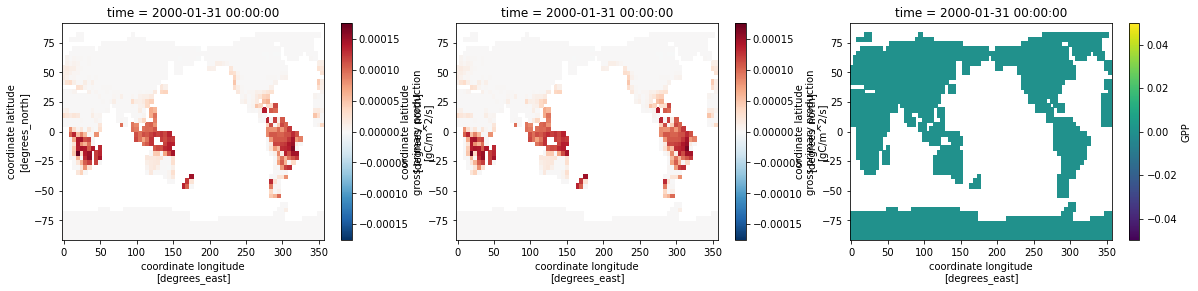

In [31]:
tstop_idx = 30
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
gpp_nl_base.isel(time=tstop_idx).plot(ax=ax1)
gpp_nl_rest.isel(time=tstop_idx).plot(ax=ax2)
gpp_nl_diff.isel(time=tstop_idx).plot(ax=ax3)

Compare the restarts between the `all_soil_patches` filter and the `nolakep` filter loop

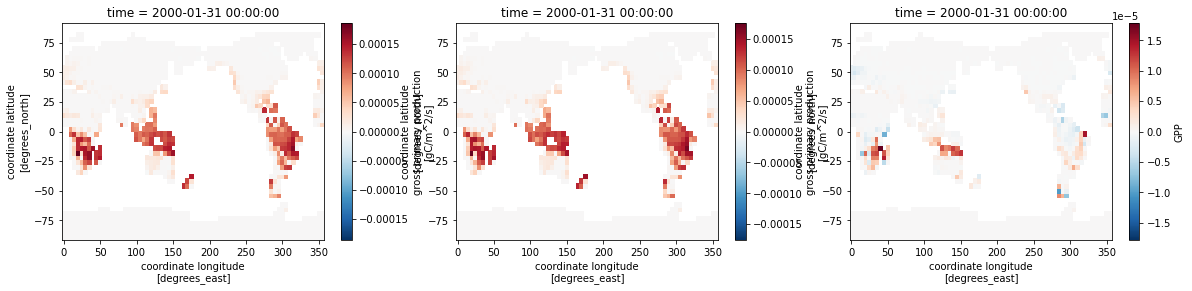

In [32]:
tstop_idx = 30
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
gpp_as_rest.isel(time=tstop_idx).plot(ax=ax1)
gpp_nl_rest.isel(time=tstop_idx).plot(ax=ax2)
gpp_asnl_rest_diff.isel(time=tstop_idx).plot(ax=ax3)

Compare the restarts between the `soilp` filter and the `nolakep` filter loop

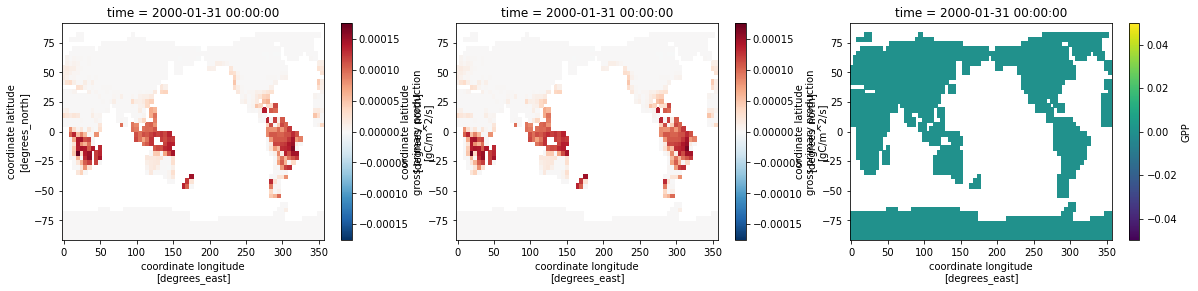

In [33]:
tstop_idx = 30
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
gpp_sp_rest.isel(time=tstop_idx).plot(ax=ax1)
gpp_nl_rest.isel(time=tstop_idx).plot(ax=ax2)
gpp_spnl_rest_diff.isel(time=tstop_idx).plot(ax=ax3)

Compare the restarts between the `all_soil_patches` filter and the `soilp` filter loop

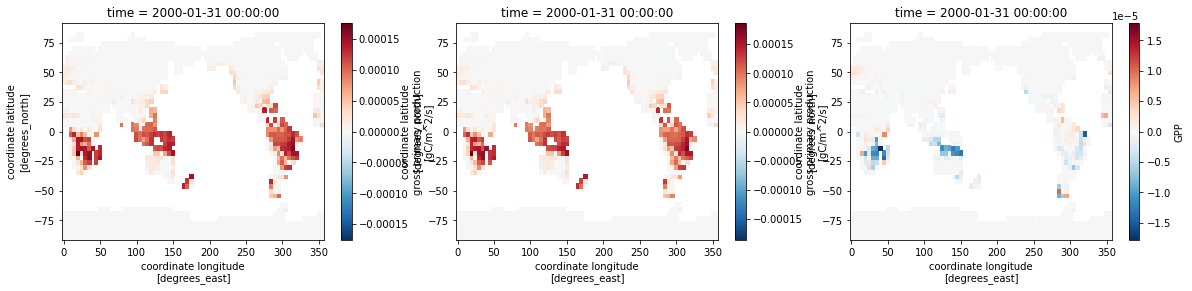

In [34]:
tstop_idx = 30
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
gpp_sp_rest.isel(time=tstop_idx).plot(ax=ax1)
gpp_as_rest.isel(time=tstop_idx).plot(ax=ax2)
gpp_spas_rest_diff.isel(time=tstop_idx).plot(ax=ax3)

### T_SCALAR

Variable diff calculations

In [40]:
tsclr_sp_base = data_sp_base.T_SCALAR
tsclr_sp_rest = data_sp_rest.T_SCALAR
tsclr_sp_diff = tsclr_sp_base - tsclr_sp_rest

tsclr_as_base = data_as_base.T_SCALAR
tsclr_as_rest = data_as_rest.T_SCALAR
tsclr_as_diff = tsclr_as_base - tsclr_as_rest

tsclr_nl_base = data_nl_base.T_SCALAR
tsclr_nl_rest = data_nl_rest.T_SCALAR
tsclr_nl_diff = tsclr_nl_base - tsclr_nl_rest

tsclr_spas_base_diff = tsclr_sp_base - tsclr_as_base
tsclr_spas_rest_diff = tsclr_sp_rest - tsclr_as_rest

tsclr_asnl_base_diff = tsclr_as_base - tsclr_nl_base
tsclr_asnl_rest_diff = tsclr_as_rest - tsclr_nl_rest

tsclr_spnl_base_diff = tsclr_sp_base - tsclr_nl_base
tsclr_spnl_rest_diff = tsclr_sp_rest - tsclr_nl_rest

Plot new `all_soil_patches` loop base-rest difference.  We see very small differences primarily in single strip in the artic

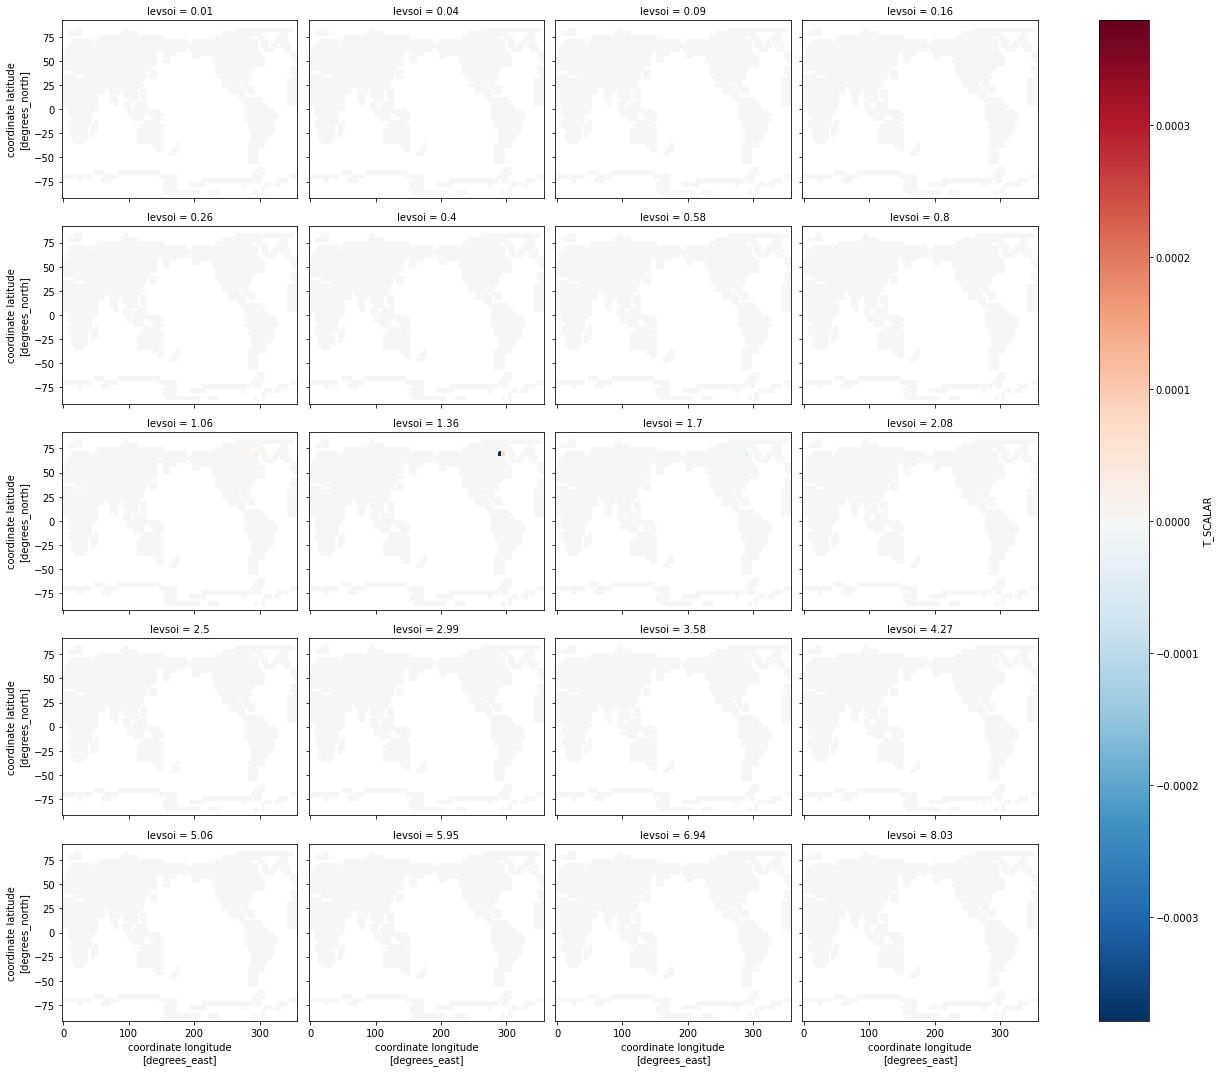

In [41]:
tsclr_as_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='levsoi',col_wrap=4,figsize=(18,15))

Plot `nolakep` loop base/rest results

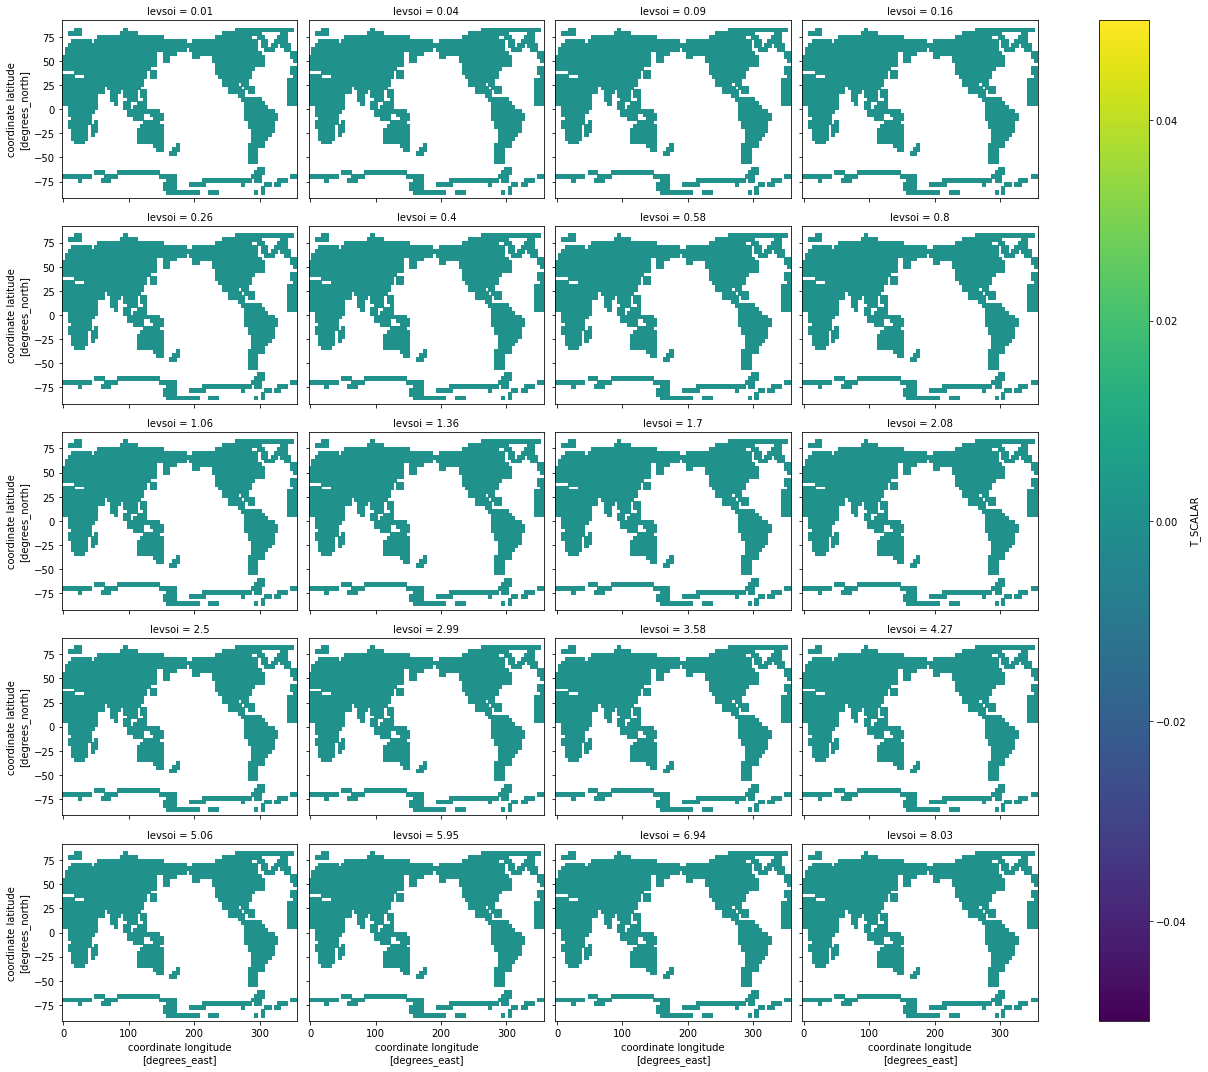

In [43]:
tsclr_nl_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='levsoi',col_wrap=4,figsize=(18,15))

Compare the restarts between the `all_soil_patches` filter and the `nolakep` filter loop

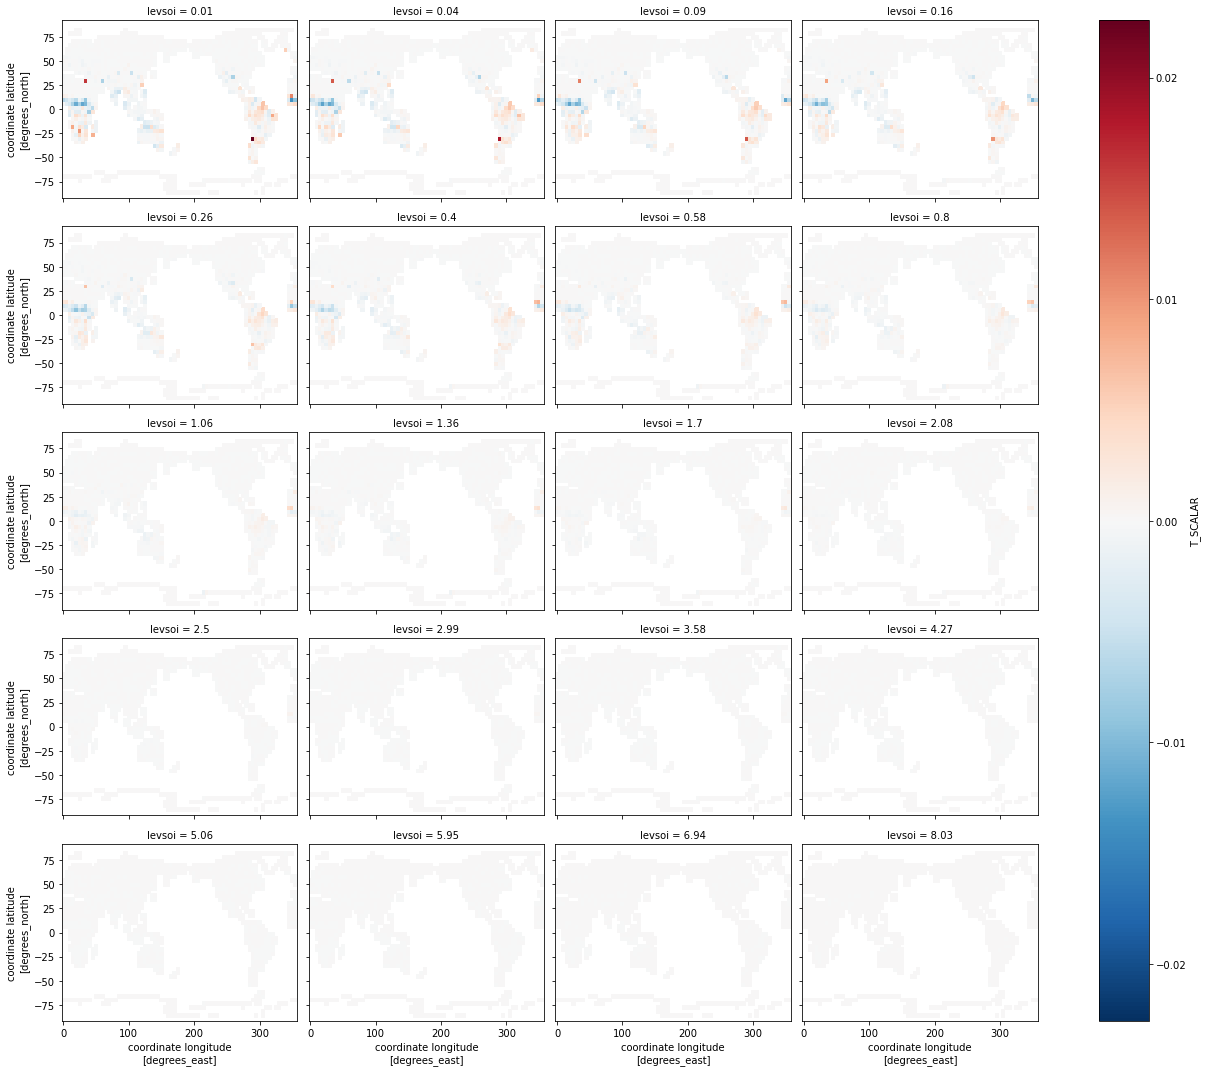

In [44]:
tsclr_asnl_rest_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='levsoi',col_wrap=4,figsize=(18,15))

### PFTbiomass

In [45]:
data_npl_base.PFTbiomass.dims

('time', 'fates_levpft', 'lat', 'lon')

In [46]:
plbm_sp_base = data_sp_base.PFTleafbiomass
plbm_sp_rest = data_sp_rest.PFTleafbiomass
plbm_sp_diff = plbm_sp_base - plbm_sp_rest

plbm_as_base = data_as_base.PFTleafbiomass
plbm_as_rest = data_as_rest.PFTleafbiomass
plbm_as_diff = plbm_as_base - plbm_as_rest

plbm_nl_base = data_nl_base.PFTleafbiomass
plbm_nl_rest = data_nl_rest.PFTleafbiomass
plbm_nl_diff = plbm_nl_base - plbm_nl_rest

plbm_spas_base_diff = plbm_sp_base - plbm_as_base
plbm_spas_rest_diff = plbm_sp_rest - plbm_as_rest

plbm_asnl_base_diff = plbm_as_base - plbm_nl_base
plbm_asnl_rest_diff = plbm_as_rest - plbm_nl_rest

plbm_spnl_base_diff = plbm_sp_base - plbm_nl_base
plbm_spnl_rest_diff = plbm_sp_rest - plbm_nl_rest

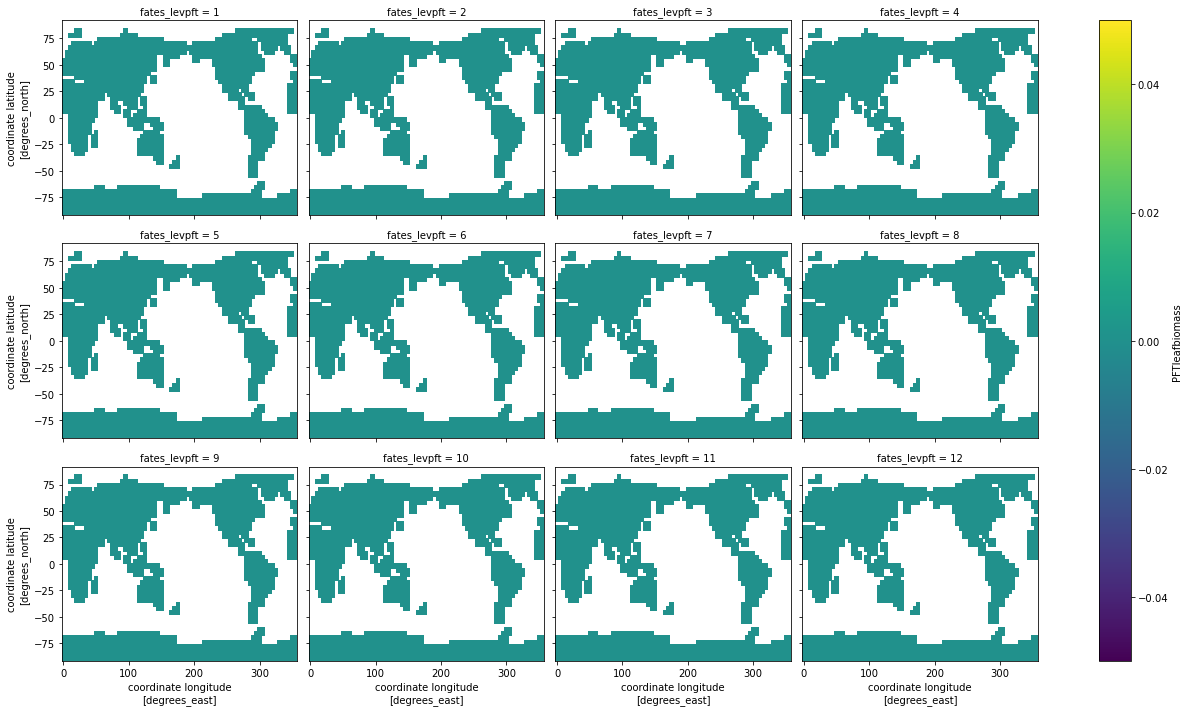

In [52]:
plbm_as_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4, figsize=(18,10))

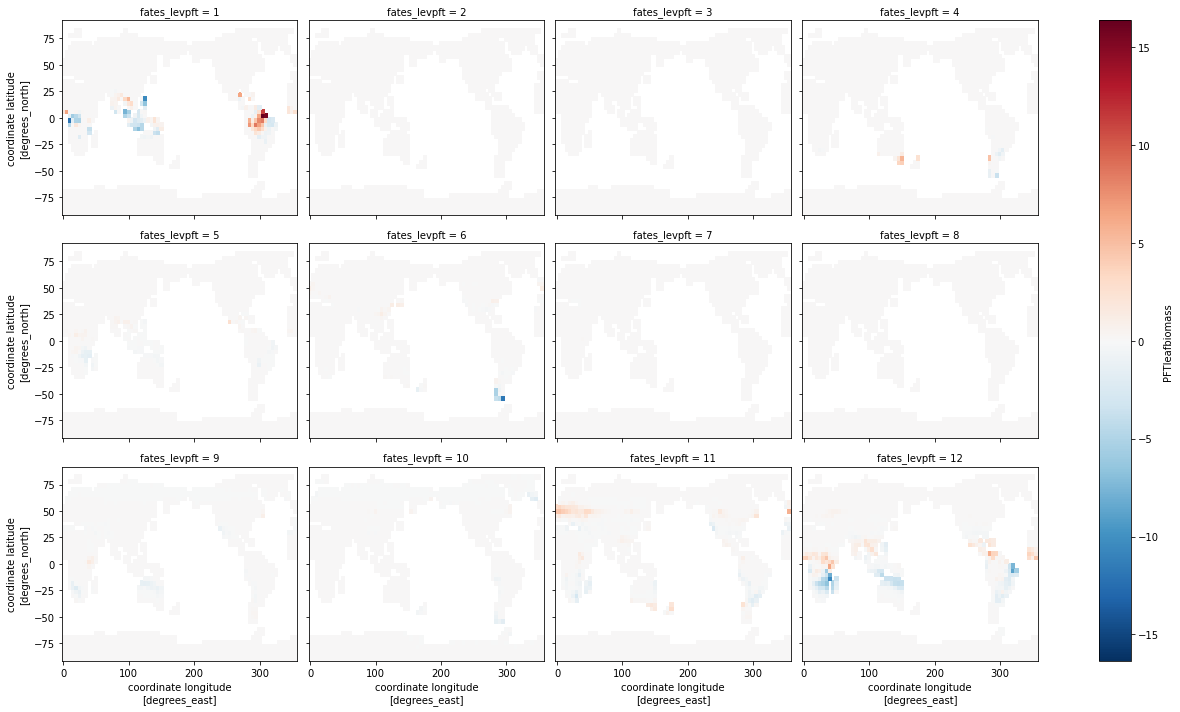

In [51]:
plbm_spas_rest_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4, figsize=(18,10))

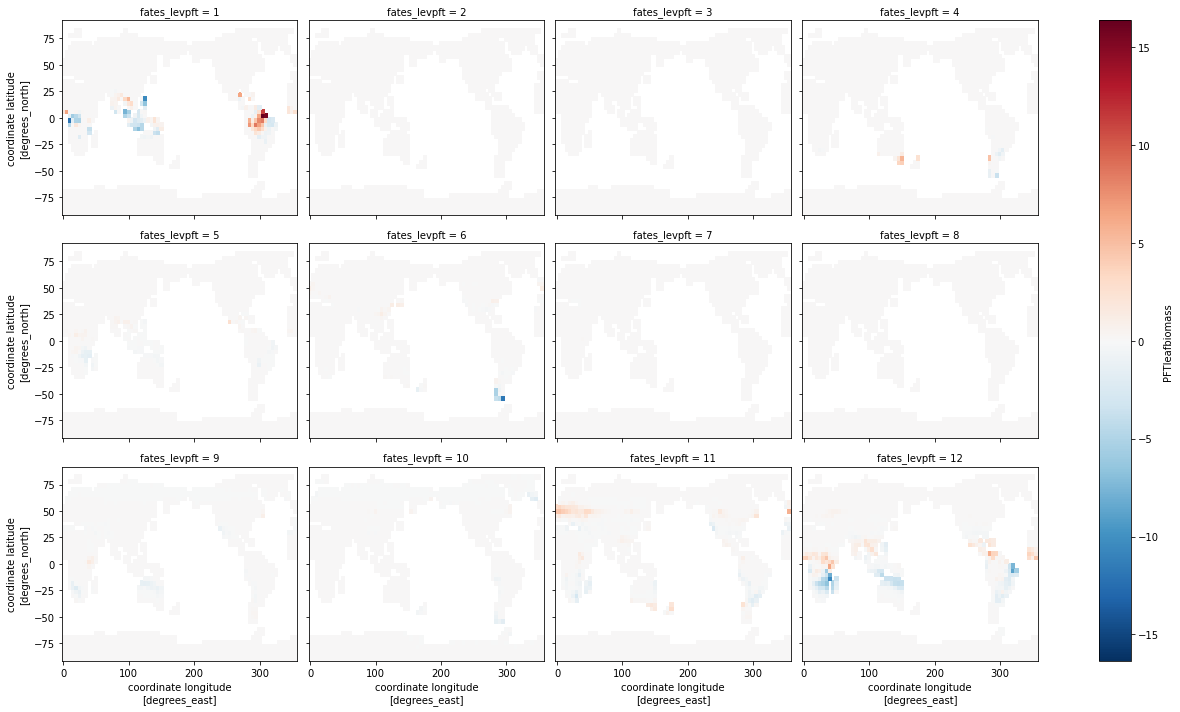

In [76]:
pbm_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4, figsize=(18,10))